In [1]:
import numpy as np
import rebound
import reboundx
from matplotlib import pyplot as plt

In [2]:
sim = rebound.Simulation()
sim.add(m=1)
sim.add(m=1e-3, a=1.5, e=0.98, r=1.6*4.67e-4, M=0)
sim.move_to_com()

rebx = reboundx.Extras(sim)
td = rebx.load_force("tides_dynamical")
rebx.add_force(td)

sim.particles[1].params["td_dP_crit"] = 0
sim.particles[1].params["td_c_real"] = 0
sim.particles[1].params["td_c_imag"] = 0
sim.particles[1].params["td_drag_exp"] = 10

N = 10000
t = np.linspace(0, 1e3, N)
e = np.zeros(t.shape)
a = np.zeros(t.shape)
M = np.zeros(t.shape)
EB0 = sim.particles[1].m / (2*1.5)
E_mode = np.zeros(t.shape)

c_real = np.zeros(t.shape)
c_imag = np.zeros(t.shape)
M_last = 0

E_peri = []

for i, time in enumerate(t):
    o = sim.particles[1].orbit(primary=sim.particles[0])
    e[i] = o.e
    a[i] = o.a
    M[i] = o.M
    E_mode[i] = EB0 * (sim.particles[1].params["td_c_real"]**2 + sim.particles[1].params["td_c_imag"]**2)
    c_real[i] = sim.particles[1].params["td_c_real"]
    c_imag[i] = sim.particles[1].params["td_c_imag"]
    if i % 5 == 0 and i != 0:
        E_tilde_mode = sim.particles[1].params["td_c_real"]**2 + sim.particles[1].params["td_c_imag"]**2
        print(t[i], e[i], a[i], sim.particles[1].params["td_drag_coef"], sim.particles[1].params["td_dP_hat"], o.M, E_tilde_mode)

    if o.M >= 2 and M_last <= 2:
        E_peri.append(E_mode[i] + sim.energy())
    sim.integrate(time * 2 * np.pi)
    M_last = o.M

0.5000500050005 0.9799999999999994 1.4999999999999518 0.0 0.0 1.3688738952171349 0.0
1.000100010001 0.9799999999999993 1.4999999999999516 0.0 0.0 3.0799662642385606 0.0
1.5001500150015001 0.9799999999999994 1.4999999999999518 2.4829681626973135e-22 13.142847184757873 4.791058633259971 0.000360182010053204
2.000200020002 0.9799927356780344 1.4994550428230027 2.4829681626973135e-22 13.142847184757873 0.21908507624190943 0.000360182010053204
2.5002500250025 0.9799927356780348 1.4994550428230022 2.4829681626973135e-22 13.142847184757873 1.9311103409742643 0.000360182010053204
3.0003000300030003 0.9799927356780346 1.4994550428230022 -3.8533001908154284e-23 39.39296614062898 3.643135605706619 0.000304285542542766
3.5003500350035 0.9799927356780346 1.4994550428230022 -3.8533001908154284e-23 39.39296614062898 5.35516087043897 0.000304285542542766
4.000400040004 0.9799938630236161 1.4995395884439264 -3.8533001908154284e-23 39.39296614062898 0.7839345247380383 0.000304285542542766
4.500450045004

(100.0, 210.0)

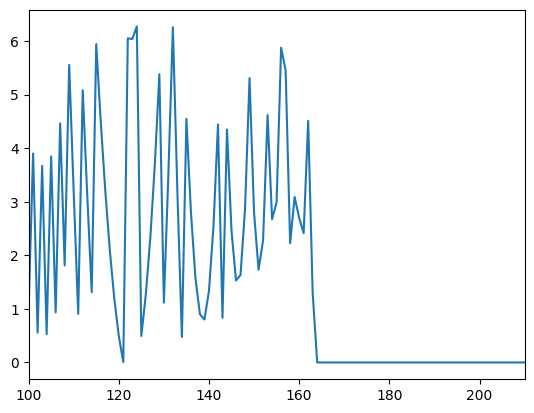

In [3]:
plt.plot(M)
plt.xlim([100, 210])

In [5]:
#sim.particles[1].params['td_debug_Eb_last']
sim.energy()

-0.0003727250741357554

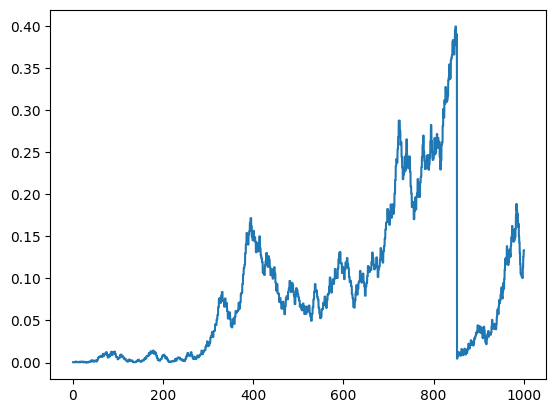

In [3]:
plt.plot(t[E_mode != 0], (E_mode / EB0)[E_mode != 0])

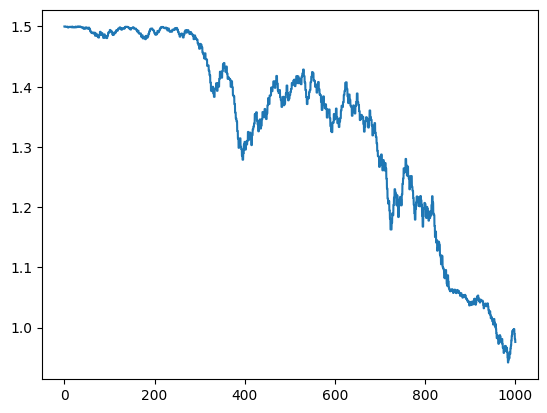

In [4]:
plt.plot(t,a)

/tmp/ipykernel_1390/2094712904.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(c_real, c_imag, s=5, c=np.log10(np.linspace(0, 10, c_real.shape[0])))


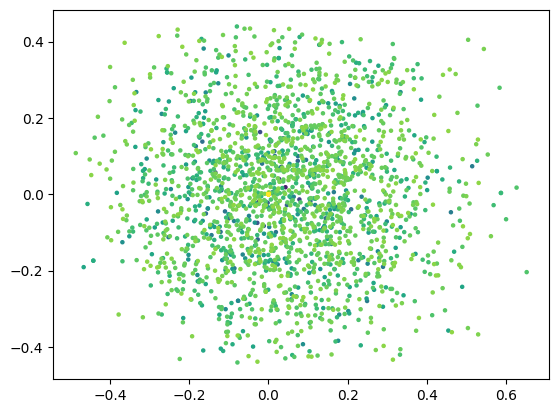

In [7]:
plt.scatter(c_real, c_imag, s=5, c=np.log10(np.linspace(0, 10, c_real.shape[0])))

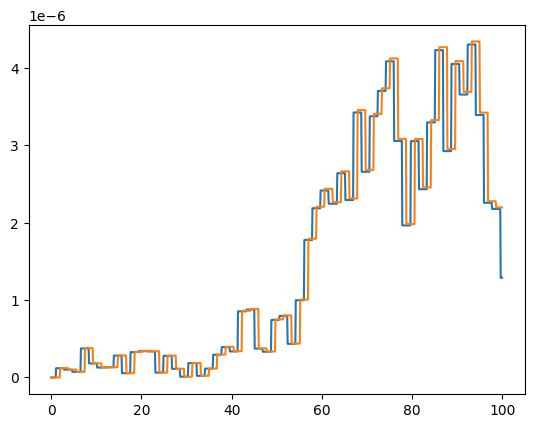

In [5]:
EB0 = sim.particles[1].m / (2*a[0])
#plt.plot(np.diff((-sim.particles[1].m / (2*a[t<=1e3])) / EB0))
#plt.plot((0, 60), (-0.01, -0.01))
#plt.plot(t, a)
#plt.plot(t, a*(1-e**2))

#plt.plot(t[t<=13], E_mode[t<=1e3])
plt.plot(t[:1000], E_mode[:1000])
plt.plot(t[:1000], -(EB0-(sim.particles[1].m / (2*a[:1000]))))
#plt.plot(E_mode[1:] + EB0 + (-(sim.particles[1].m / (2*a[:-1]))))
#plt.plot(E_peri)